In [1]:
# Import the Path class from the pathlib module
from pathlib import Path

# Create a Path object for the directory 'samples'
path = Path('all-samples-wav')

# Initialize an empty list to hold the file paths
files = []

# Check if the path exists and if it's a directory
if path.exists() and path.is_dir():
    # Use a list comprehension with rglob() to gather all .wav files (recursively)
    # and store them in the 'files' list
    files = [file for file in path.rglob('*.wav')]

    # Check how many files were in the directory
    print(f"found {len(files)} audio files in '{path}' folder.")

# If the path doesn't exist or isn't a directory, print a message
else:
    print("'all-samples-wav' directory does not exist.")

found 13300 audio files in 'all-samples-wav' folder.


### 2
1.What object type is the variable path?
It is a filesystem path.

2.What object type is stored in the files list?
Path objects,specifically, each item in the files list is a Path object representing a .wav file .

3.Explain the difference between path.exists() and path.is_dir(). Why might both checks be necessary?
path.exist()checks whether the path refers to an existing file or directory in the file system,it doesn't distinguish between types of filesystem objects. 
"path.is-dir()"specifically checks if the path is referring to an existing directory. path.exists() ensures that something is actually there at the specified path, otherwise might try to operate on a non-existent path, and therefore might create errors.

4.Describe the functionality of the rglob() method. How does it differ from the glob() method in pathlib?
"rglob()" is a method for searching for files matching a pattern, it search all directories, but glob() only search current directory.
5.What can you infer about the directory structure from the use of rglob('*.wav')?
"rglob('*.wav')" not only searches for the given directory but also searches its all subdirectories rescursively, so we can infer that all audio files in the folder are not stored in a single flat directory, otherwise a "glob('*.wav')" would have sufficed already.
6.What modifications would be needed to include .mp3 files in the files list?
(*I've asked AI for this one because I have no idea how to achieve it.) ''files = [file for file in path.rglob('*.wav')]''
7.If the goal is to also print the names of all the .wav files collected, how can you achieve this?
Use a for loop: 
'
print("Collected .wav files:")
for file in files:
    print(file.name)

print(f"\nTotal number of .wav files: {len(files)}")
'
8.Why might it be beneficial to initialize the files list before populating it with file paths?
Claerify the file list could make the codes more readable and easier to add on more additional statements or logics, also easier for debugging.

###

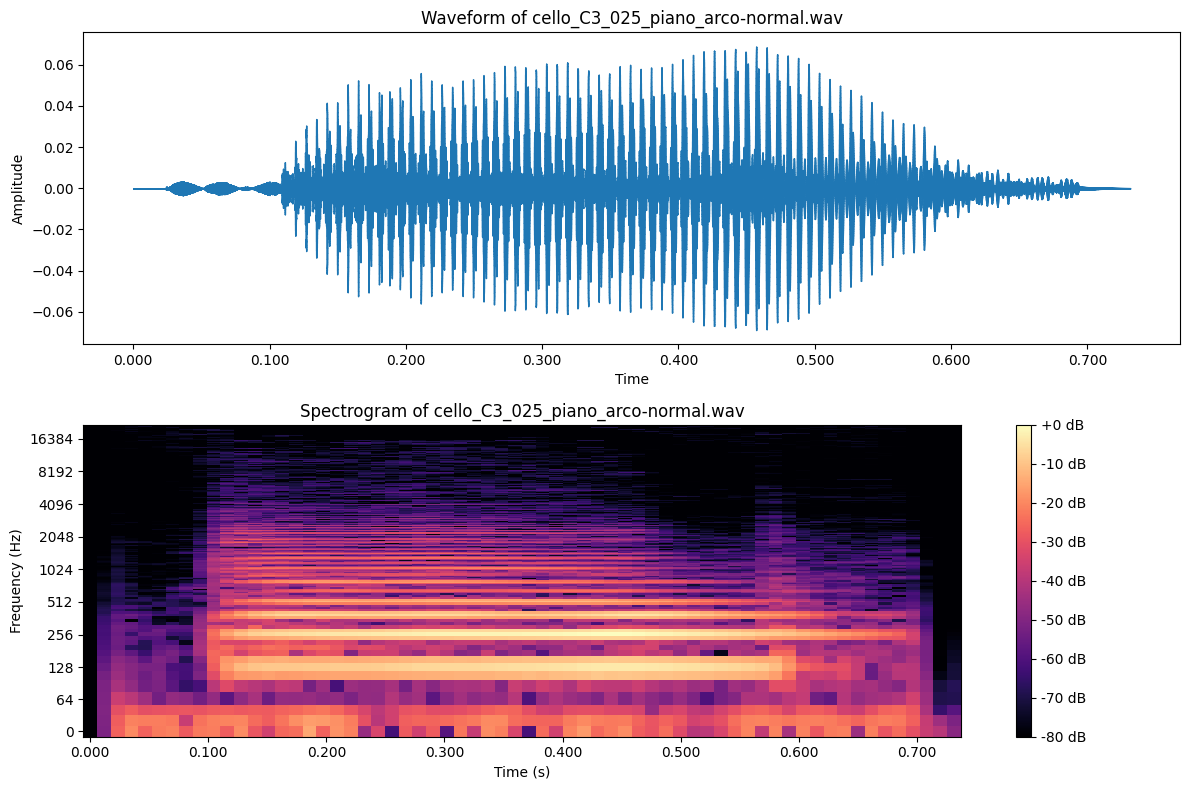

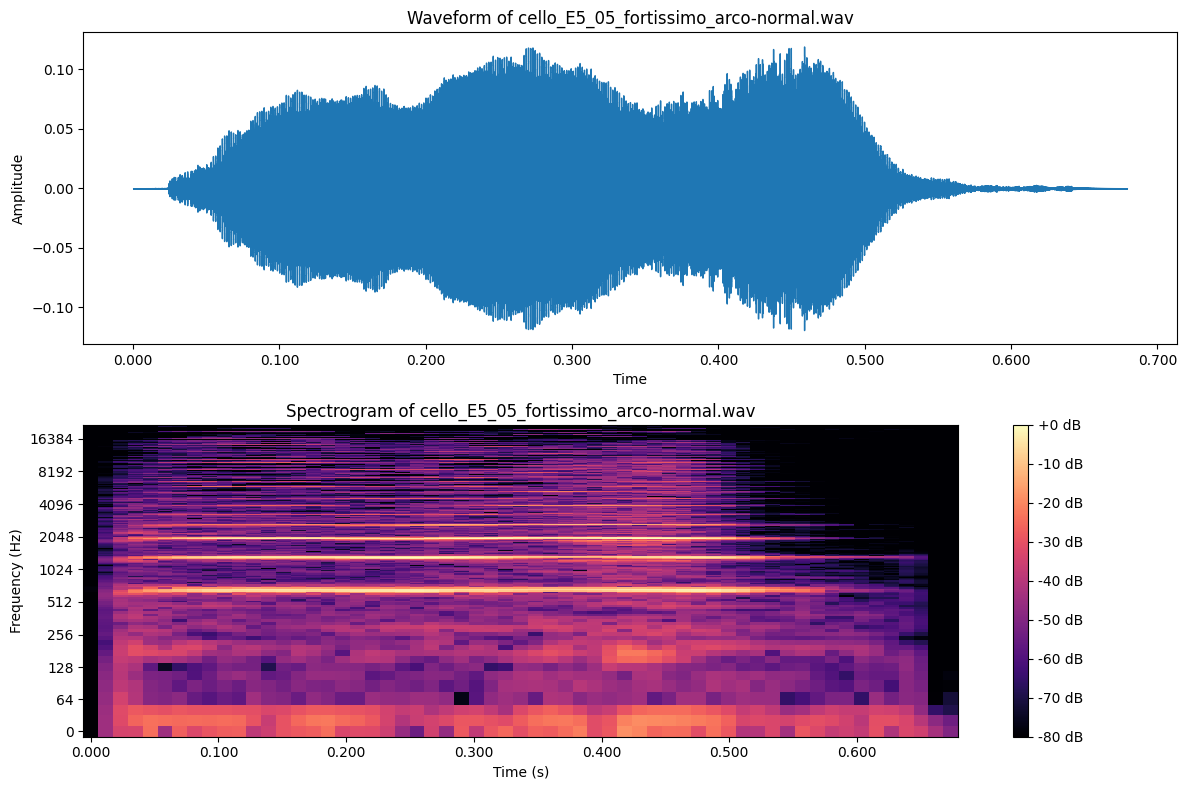

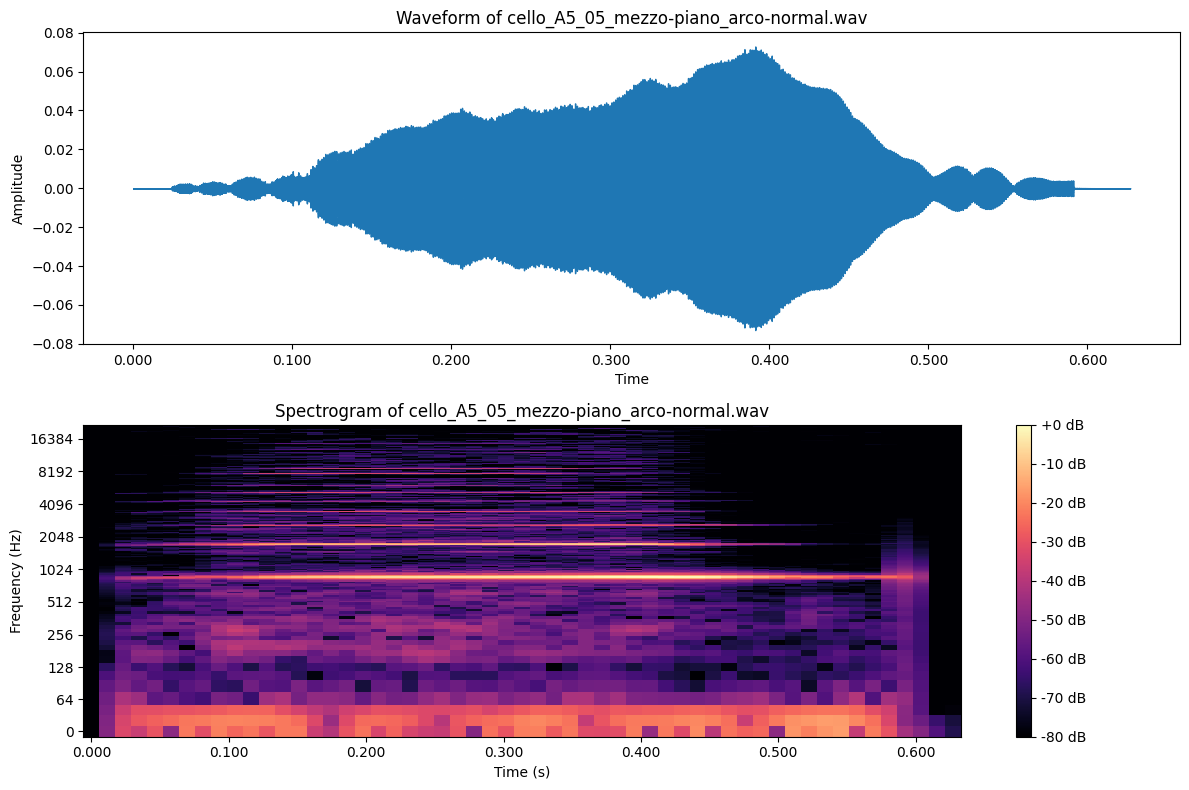

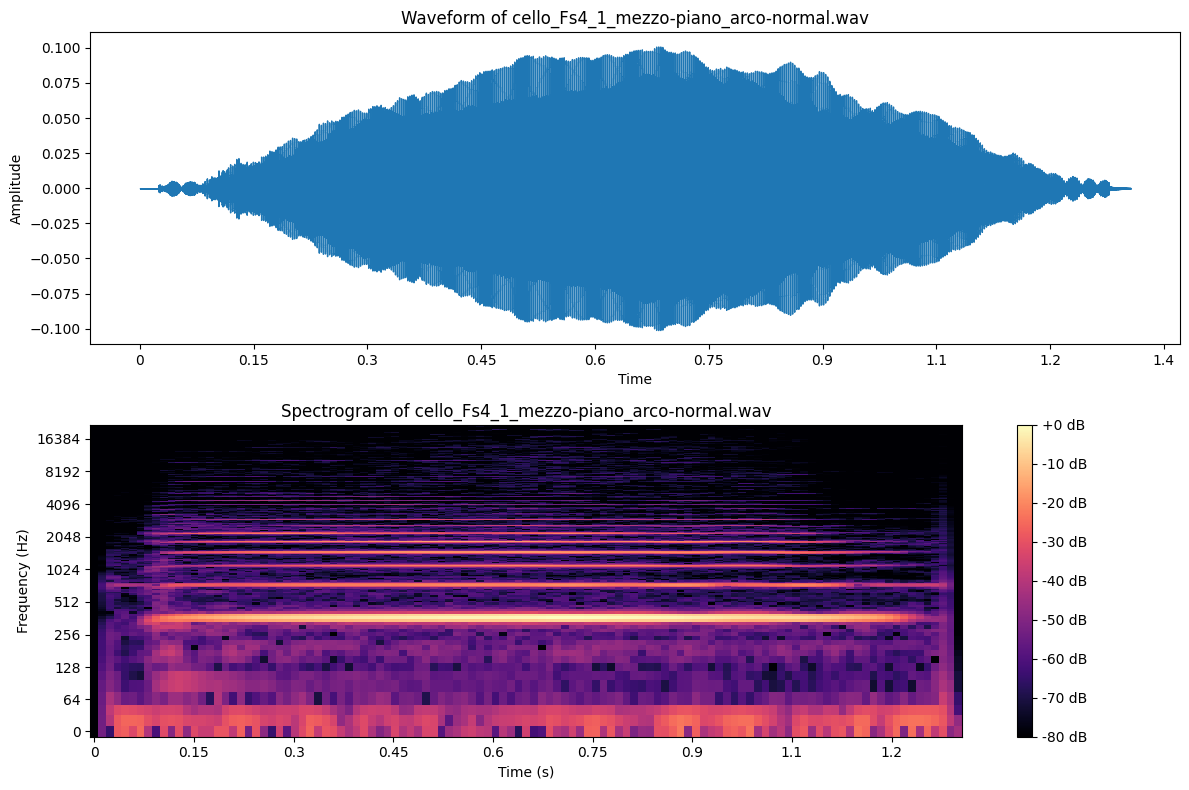

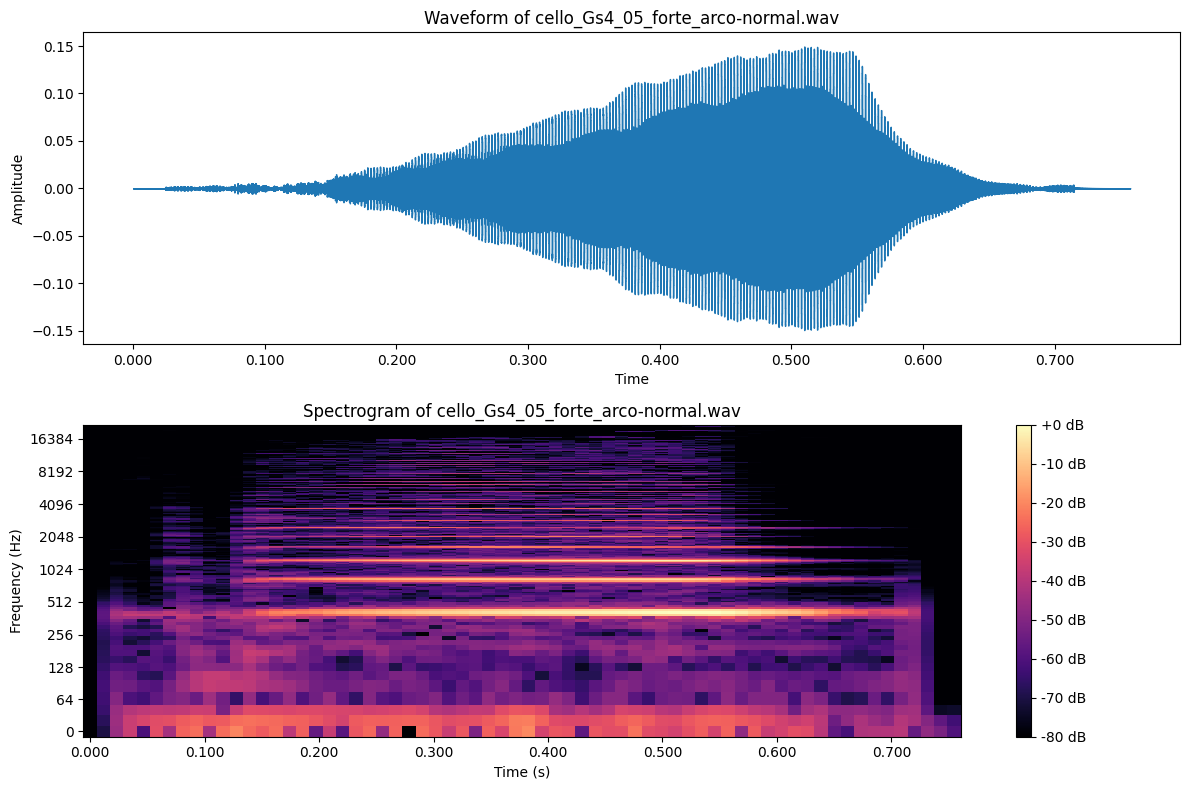

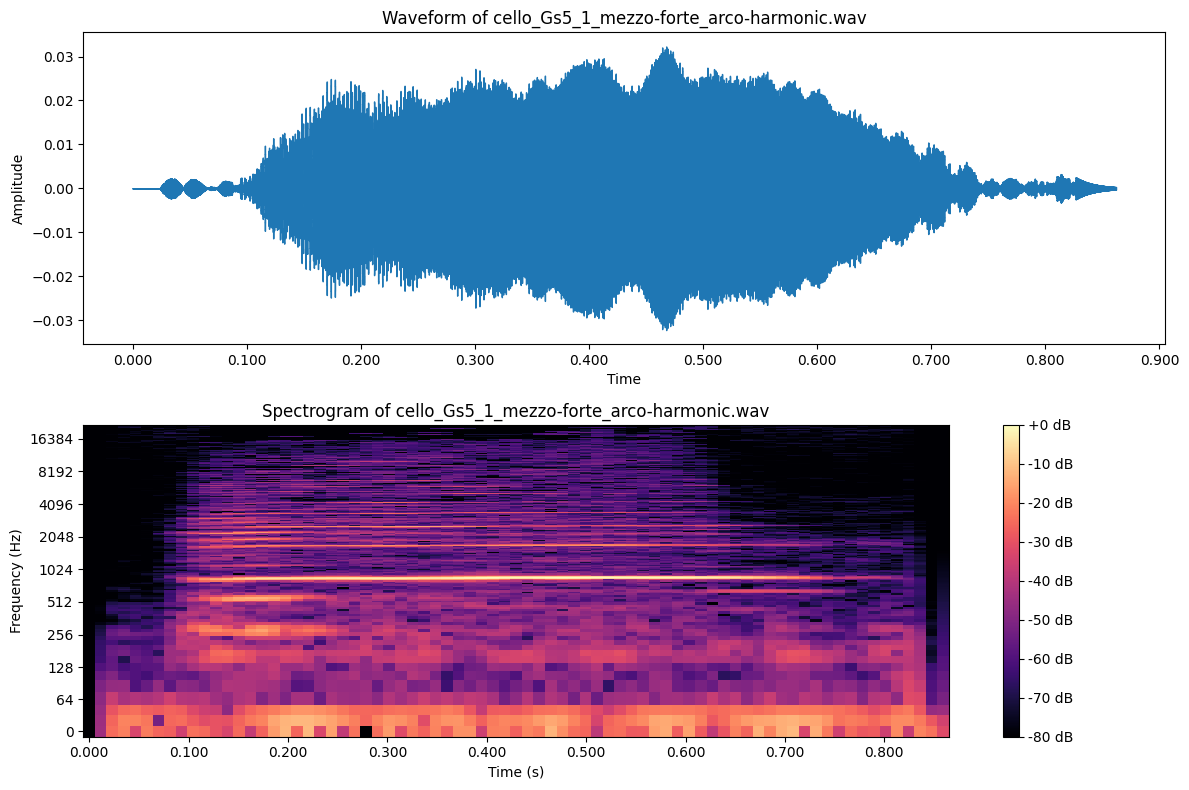

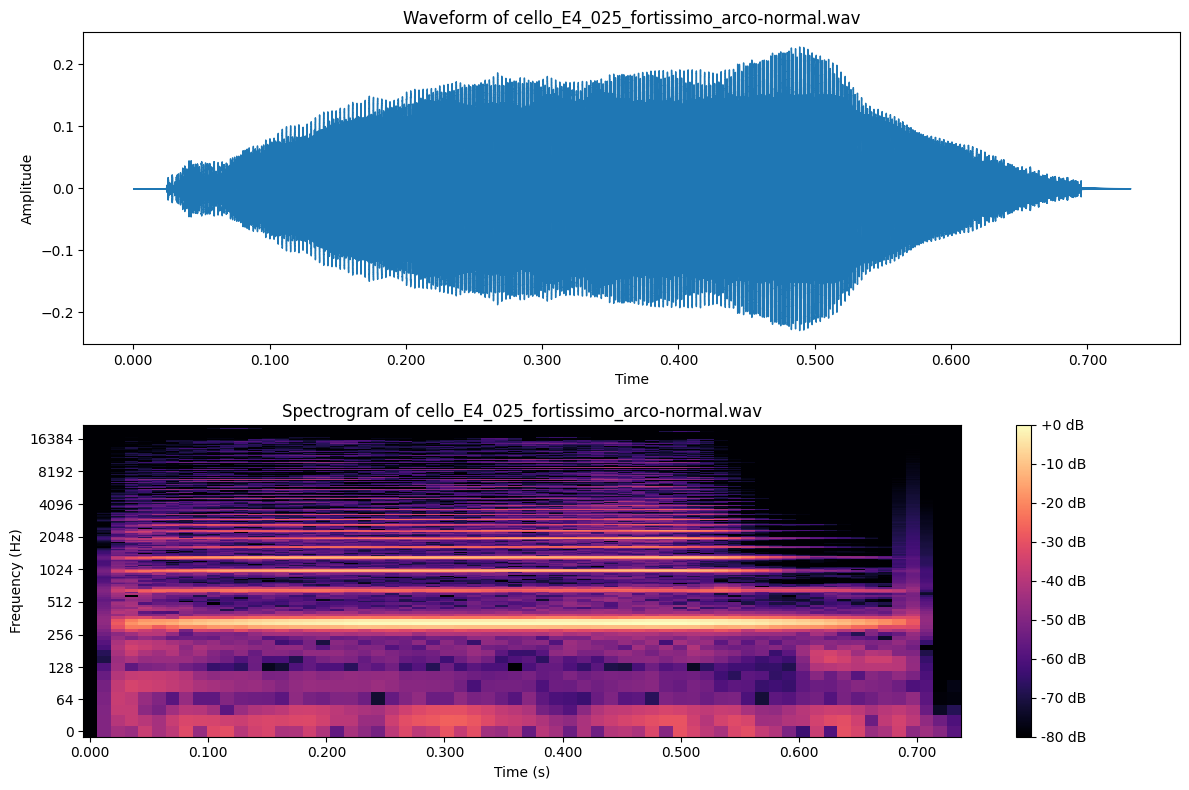

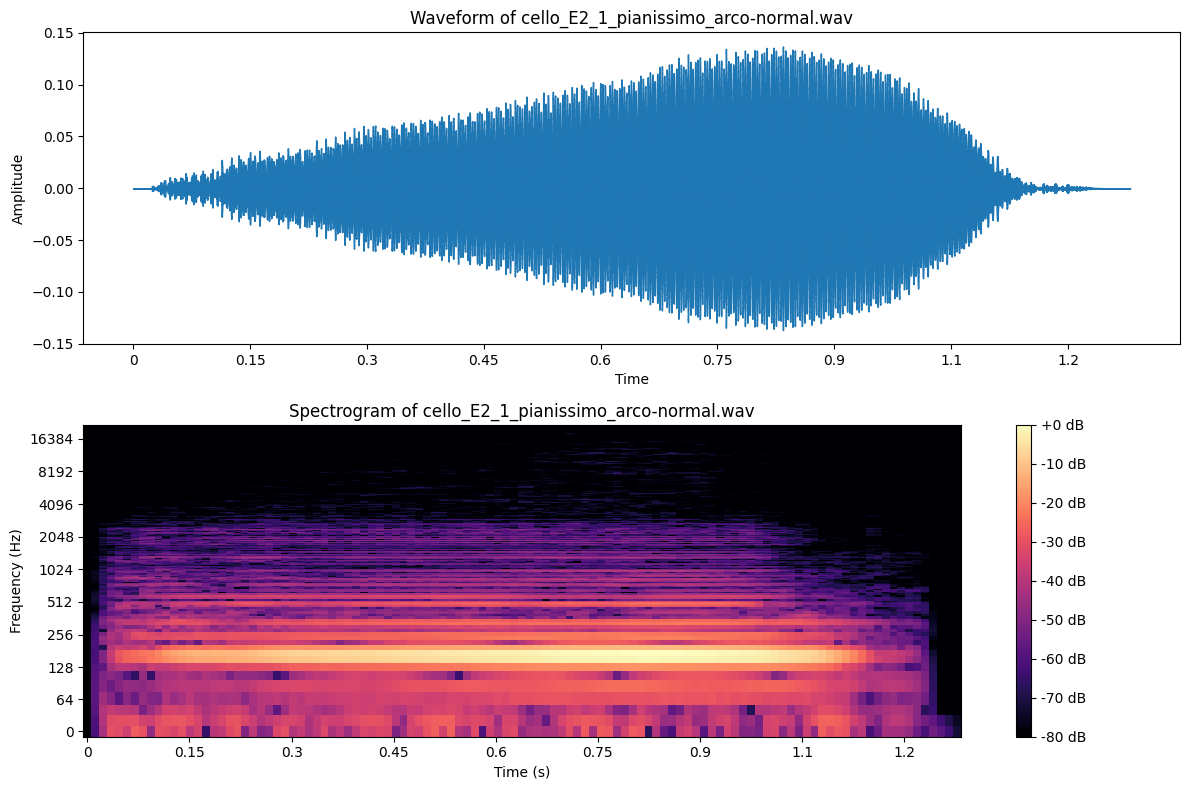

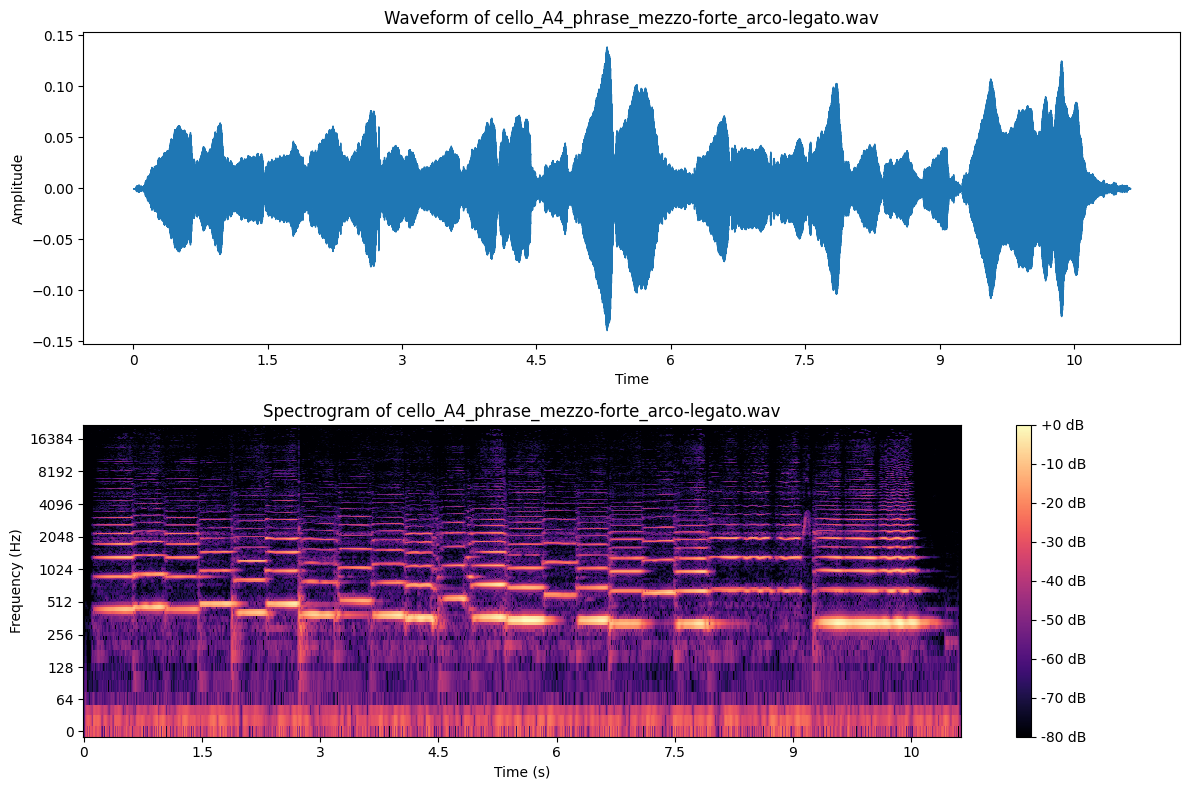

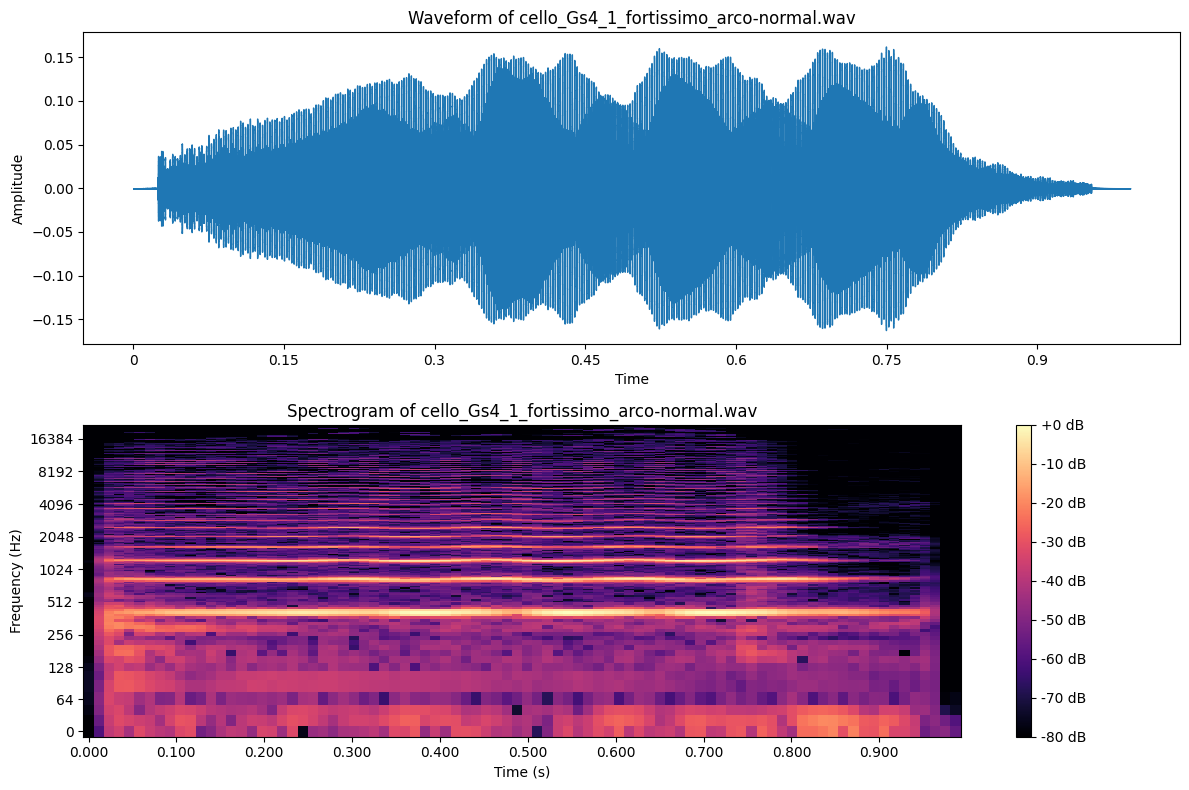

In [3]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os

# Go through the first 10 files in `files`
for index, file_path in enumerate(files[:10]):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Create a figure with two subplots: one for the waveform and one for the spectrogram
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot the waveform
    ax[0].set_title(f"Waveform of {os.path.basename(file_path)}")
    librosa.display.waveshow(y, sr=sr, ax=ax[0])
    ax[0].set_ylabel('Amplitude')
    
    # Compute and plot the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=ax[1])
    ax[1].set_title(f"Spectrogram of {os.path.basename(file_path)}")
    ax[1].set_ylabel('Frequency (Hz)')
    ax[1].set_xlabel('Time (s)')
    fig.colorbar(img, ax=ax[1], format="%+2.0f dB")
    
    plt.tight_layout()
    plt.show()

1. What is the role of the `os.path.basename()` function in this code?
   It extracts the filename from a full file path.In this code, it's used to get just the filename. Make the whole process more readable.
2. What does the Short-Time Fourier Transform (STFT) achieve? Why might it be used instead of a regular Fourier Transform for audio signals?
   FFT breaks down audio signals into short windows and apply the transformer on these windos. This allows us to see how frequency content changes over time.
3. Why might the code use two subplots (one for waveform and one for spectrogram) for each audio file? How does this help in understanding the audio data?
waveform shows amplitude variations over time and spectrogram shows how different frequencies are present over time, which they give out a clear view about the audio files.
4. How does the color bar in the spectrogram visualization help in interpreting the data? What does it represent?
The color bar represents how intense of different frequencies at different times,bright meaning more intense darker meaning less.
5. How would the visualization change if you change the `y_axis` parameter in `librosa.display.specshow()` from 'log' to 'linear'?
Log mode would emphasis lower frequency more and linear would display them evenly.
6. Are there any potential performance bottlenecks in visualizing audio data for a large number of files? How might you handle them?
   Slow speed on reading lots of audio files, maybe we can process the files in batch; It might occupy lots of memory usage, downsample the audio if full resolution is not neccessary in this context.